<a href="https://colab.research.google.com/github/victormattos2013/ml_finished_projects/blob/main/Victor_Henrique_Classifica%C3%A7%C3%A3o_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1 Pré-processamento


## 1.1 - Importando os dados

In [ ]:
import pandas as pd
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import io

# Load the dataset
url = 'https://raw.githubusercontent.com/victormattos2013/machine_learning/main/Customer-Churn.csv'
dados = pd.read_csv(url)
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


## 1.2 - Diferentes Variáveis

In [ ]:
x = dados.drop('Churn', axis=1)

In [ ]:
y = dados["Churn"] #classes
y.head()

,Churn
0,Nao
1,Nao
2,Sim
3,Nao
4,Sim


In [ ]:
dados.shape

(7043, 18)

In [ ]:
for col in dados.columns:
    print(col, dados[col].unique())

Maior65Anos [0 1]
Conjuge ['Sim' 'Nao']
Dependentes ['Nao' 'Sim']
MesesDeContrato [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
TelefoneFixo ['Nao' 'Sim']
VariasLinhasTelefonicas ['SemServicoTelefonico' 'Nao' 'Sim']
ServicoDeInternet ['DSL' 'FibraOptica' 'Nao']
SegurancaOnline ['Nao' 'Sim' 'SemServicoDeInternet']
BackupOnline ['Sim' 'Nao' 'SemServicoDeInternet']
SeguroNoDispositivo ['Nao' 'Sim' 'SemServicoDeInternet']
SuporteTecnico ['Nao' 'Sim' 'SemServicoDeInternet']
TVaCabo ['Nao' 'Sim' 'SemServicoDeInternet']
StreamingDeFilmes ['Nao' 'Sim' 'SemServicoDeInternet']
TipoDeContrato ['Mensalmente' 'UmAno' 'DoisAnos']
PagamentoOnline ['Sim' 'Nao']
FormaDePagamento ['ChequeDigital' 'ChequePapel' 'DebitoEmConta' 'CartaoDeCredito']
ContaMensal [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
Churn ['Nao' 'Sim']


In [ ]:
#Modificação de forma manual
traducao_dic = {'Sim': 1,
                'Nao': 0}

#Criando um novo dataframe de classes binárias
dados_binarios = dados[['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn']]

#Trocando valores binarios
dados_binarios.replace(traducao_dic, inplace=True)
dados_binarios.head()

<ipython-input-6-b9ba132b67d2>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dados_binarios.replace(traducao_dic, inplace=True)


,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1


In [ ]:
#Tratando colunas de classes múltiplas
#Transformação pelo get_dummies
#axis=1 representa colunas pois o drop padrão remove linhas
dados_sem_colunas_bin = dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1)

#Convertendo colunas de classes múltiplas
dummie_dados = pd.get_dummies(dados_sem_colunas_bin)
dummie_dados.head()

,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,29.85,False,True,False,True,False,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,34,56.95,True,False,False,True,False,False,False,...,True,False,False,False,False,True,False,False,True,False
2,0,2,53.85,True,False,False,True,False,False,False,...,True,False,False,False,True,False,False,False,True,False
3,0,45,42.30,False,True,False,True,False,False,False,...,True,False,False,False,False,True,False,False,False,True
4,0,2,70.70,True,False,False,False,True,False,True,...,True,False,False,False,True,False,False,True,False,False


In [ ]:
#Concatenando os dados
dados_final = pd.concat([dados_binarios, dummie_dados], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,...,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,...,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,...,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,...,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,...,True,False,False,False,True,False,False,True,False,False


## 1.3 - Definição Formal

Informações para classificação:

$X$ = inputs (dados de entrada)

$y$ = outputs (dados de saída)

In [ ]:
#DICA
pd.set_option('display.max_columns', 39)

In [ ]:
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False
1,0,0,1,0,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False
2,0,0,1,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False
3,0,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True
4,0,0,1,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False


In [ ]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

In [ ]:
#ymaria = ?

Novos pares de informações = ($Xmaria$, $ymaria$)

## 1.4 - Balanceamento dos dados

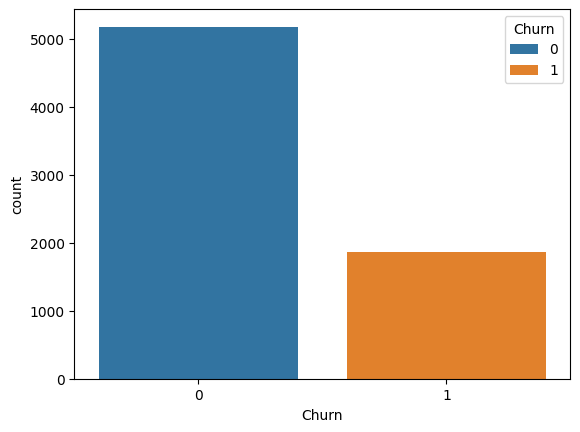

In [ ]:
#Variável target está desbalanceada
import seaborn as sns
%matplotlib inline
ax = sns.countplot(x='Churn', hue='Churn', data=dados_final)

In [ ]:
dados_final['Churn'].value_counts()

,count
Churn,
0,5174
1,1869


In [ ]:
from imblearn.over_sampling import SMOTE

https://medium.com/turing-talks/dados-desbalanceados-o-que-s%C3%A3o-e-como-evit%C3%A1-los-43df4f49732b

In [ ]:
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [ ]:
seed = 123
smt = SMOTE(random_state=seed)
X, y = smt.fit_resample(X, y)

In [ ]:
#Junção dos dados balanceados
dados_final = pd.concat([X, y], axis=1)
dados_final.head()

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,1,0,0,1,0,1,29.85,False,True,False,True,False,False,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,0
1,0,0,1,0,0,34,56.95,True,False,False,True,False,False,False,False,True,True,False,False,False,False,True,True,False,False,True,False,False,True,False,False,False,False,True,False,False,True,False,0
2,0,0,1,1,0,2,53.85,True,False,False,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,False,True,False,1
3,0,0,0,0,0,45,42.30,False,True,False,True,False,False,False,False,True,True,False,False,False,False,True,False,False,True,True,False,False,True,False,False,False,False,True,False,False,False,True,0
4,0,0,1,1,0,2,70.70,True,False,False,False,True,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,True,False,False,False,True,False,False,True,False,False,1


In [ ]:
dados_final['Churn'].value_counts()

,count
Churn,
0,5174
1,5174


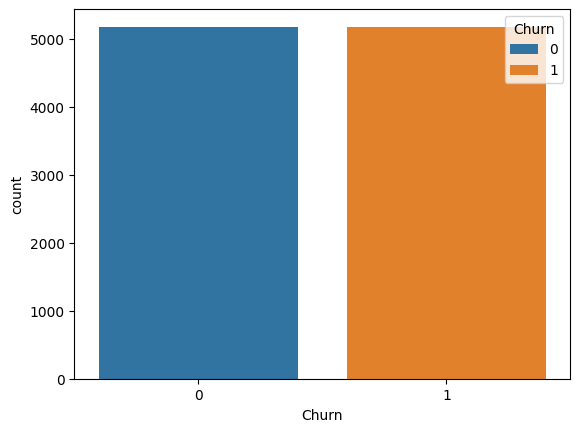

In [ ]:
ax = sns.countplot(x='Churn', hue='Churn', data=dados_final)

# 2 Support Vector Classifier (SVC)

## 2.1 - Importando bibliotecas

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## 2.2 - Normalizar dados (numéricos) na mesma escala - Parte do pré-processamento

In [ ]:
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado

array([[ 1.26568609, -0.52726104, -3.0591434 , ...,  1.05361957,
        -0.54727528, -0.53130034],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.94910918,
         1.82723399, -0.53130034],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.94910918,
         1.82723399, -0.53130034],
       ...,
       [-0.79008532, -0.52726104,  0.32688889, ...,  1.05361957,
        -0.54727528, -0.53130034],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.94910918,
        -0.54727528, -0.53130034],
       [-0.79008532, -0.52726104,  0.32688889, ..., -0.94910918,
        -0.54727528, -0.53130034]])

## 2.3 - Separar dados de treino e teste


In [ ]:
#Features(X) Classes (Y)

X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

In [ ]:
seed = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado,y, random_state=seed, test_size = 0.25, stratify=y) #Dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

Treinamento com 7761 elementos e testaremos com 2587 elementos


## 2.4 - Criar modelo

In [ ]:
svc = SVC(gamma='auto', random_state=seed)
svc

SVC(gamma='auto', random_state=123)

## 2.5 - Treinar modelo

In [ ]:
treino_svc = svc.fit(x_treino, y_treino)
print(treino_svc)

SVC(gamma='auto', random_state=123)


## 2.6 - Testar modelo

In [ ]:
previsoes_svc = svc.predict(x_teste)
print(previsoes_svc)

[1 0 0 ... 1 0 1]


In [ ]:
Xmaria_normalizado = norm.transform(Xmaria)
previsoes_maria = svc.predict(Xmaria_normalizado)
print(previsoes_maria)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
Xmaria_normalizado

array([[-0.79008532, -0.52726104,  0.32688889,  0.81449258, -0.41318358,
        -1.14939314, -0.97235197,  1.00426111, -0.32688889, -0.93540224,
        -0.67423777,  0.94470379, -0.44850949,  0.77819389, -0.44850949,
        -0.59625062, -1.0970768 , -0.44850949,  1.3517849 ,  0.91935908,
         2.22960721, -0.73991904, -1.27243223,  2.22960721, -0.60667885,
         1.08898545, -0.44850949, -0.84672335, -0.904075  , -0.44850949,
         1.16590099, -0.4605816 , -1.45333425,  2.1147664 , -0.50805069,
        -0.94910918, -0.54727528,  1.8821746 ]])

In [ ]:
y_teste

,Churn
9385,1
3570,0
6465,0
1214,1
7334,1
...,...
9853,1
5641,0
10107,1
4747,0


# 3 Modelo K-nearest neighbors (KNN) - método baseado na proximidade


## 3.1 - Importando bibliotecas

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## 3.2 - KNN por trás dos panos

Distância Euclidiana:

$$\sqrt{\sum_{i=1}^k(a_{i}-b_{i})^2}$$

In [ ]:
#Features(X) Classes (Y)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Separar treinos e testes
seed = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X_normalizado,y, random_state=seed, test_size = 0.25, stratify=y) #Dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

#Instanciando o modelo (criamos o modelo) - por padrão são 5 vizinhos
knn = KNeighborsClassifier(metric='euclidean', n_neighbors=11)

#Treinando modelo
knn.fit(x_treino, y_treino)

#Testar modelo
previsoes_knn = knn.predict(x_teste)
print(previsoes_knn)
#Acurácia
acuracia = accuracy_score(y_teste, previsoes_knn) * 100
print("A acurácia do knn foi %.2f%%" % acuracia)

Treinamento com 7761 elementos e testaremos com 2587 elementos
[1 0 0 ... 1 0 1]
A acurácia do knn foi 81.79%


In [ ]:
#Refazendo o código para Xmaria_normalizado
Xmaria_normalizado = norm.transform(Xmaria)
previsoes_knn_maria = knn.predict(Xmaria_normalizado)
print("Previsão para Xmaria:", previsoes_knn_maria)

Previsão para Xmaria: [0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


# 4 Método probabilístico

## 4.1 - Teorema de Naive Bayes


$P(y|X)$ = ${P(X|y) + P(y) \over P(X)}$

$P(xi|y)$ = P(i|y)xi + (1 - P(i|y))(1 - xi)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Features(X) Classes (Y)
X = dados_final.drop('Churn', axis=1)
y = dados_final['Churn']

#Separar treinos e testes
seed = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X,y, random_state=seed, test_size = 0.25, stratify=y) #Dividir as classes proporcionamente conforme o y
print("Treinamento com %d elementos e testaremos com %d elementos" % (len(x_treino), len(x_teste)))

#Instanciando o modelo
naive_bayes = MultinomialNB() #GaussianNB()

#Treinando o modelo
naive_bayes.fit(x_treino, y_treino)

#Fazendo previsões
previsoes_nb = naive_bayes.predict(x_teste)

#Calculando a acurácia
acuracia_nb = accuracy_score(y_teste, previsoes_nb) * 100
print("A acurácia do Naive Bayes foi %.2f%%" % acuracia_nb)

#Refazendo o código para Xmaria_normalizado
#Xmaria_normalizado = norm.transform(Xmaria)
previsoes_nb_maria = naive_bayes.predict(Xmaria)
print("Previsão para Xmaria:", previsoes_nb_maria)

Treinamento com 7761 elementos e testaremos com 2587 elementos
A acurácia do Naive Bayes foi 73.83%
Previsão para Xmaria: [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but MultinomialNB was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.naive_bayes import BernoulliNB

#Features (X) e Classes (y)
X = dados_final.drop('Churn', axis=1)
y = dados_final["Churn"]

#Normalizar os dados (dados numéricos)
#norm = StandardScaler()
#X_normalizado = norm.fit_transform(x)


# separar dados de treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify=y)

# criar o modelo
bnb = BernoulliNB()

# treinar o modelo
bnb.fit(x_treino, y_treino)

# testar o modelo
previsoes_nb = bnb.predict(x_teste)

#Acurácia
acuracia_bnb = accuracy_score(y_teste, previsoes_nb) * 100
print("A acurácia do Bernoulli Naive Bayes foi %.2f%%" % acuracia_bnb)

# usar o moelo
# Xmaria_normalizado = norm.transform(Xmaria)
print(bnb.predict(Xmaria))

A acurácia do Bernoulli Naive Bayes foi 76.42%
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but BernoulliNB was fitted with feature names
  warnings.warn(


# 5 Método Simbólico

## Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

#Features (X) e Classes (y)
X = dados_final.drop('Churn', axis=1)
y = dados_final["Churn"]

#Normalizar os dados (dados numéricos)
#norm = StandardScaler()
#X_normalizado = norm.fit_transform(x)


# separar dados de treino e teste
SEED = 123
x_treino, x_teste, y_treino, y_teste = train_test_split(X, y, test_size = 0.25, random_state = SEED, stratify=y)

# criar o modelo

dtc = DecisionTreeClassifier(max_depth=5)

# treinar o modelo
dtc.fit(x_treino, y_treino)

# testar o modelo
previsoes_dt = dtc.predict(x_teste)
acuracia_dt = accuracy_score(y_teste, previsoes_dt) * 100
print("A acurácia da árvore de Decisão foi %.2f%%" % acuracia_dt)
# usar o moelo
# Xmaria_normalizado = norm.transform(Xmaria)
print(dtc.predict(Xmaria))

A acurácia da árvore de Decisão foi 79.71%
[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## 5.1 - Por trás da árvore de decisão

Critério de divisão dos nós

Para conseguir identificar qual o melhor momento em que um nó deve ser dividido em dois ou mais subnós, o algoritmo da árvore de decisão considera alguns critérios. Os dois principais critérios de divisão usados nas árvores de decisão são:

**Índice Gini**

Este índice informa o grau de heterogeneidade dos dados. O objetivo dele é medir a frequência de um elemento aleatório de um nó ser rotulado de maneira incorreta. Em outros termos, esse índice é capaz de medir a impureza de um nó e ele é determinado por meio do seguinte cálculo:


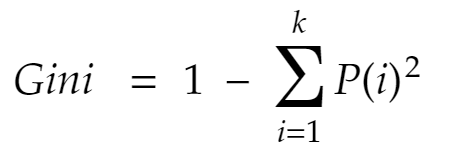

Onde:

p(i) representa a frequência relativa das classes em cada um dos nós;
k é o número de classes. Se o índice Gini for igual a 0, isso indica que o nó é puro. No entanto, se o valor dele se aproxima mais do valor 1, o nó é impuro.

**Entropia***

A ideia básica da entropia é medir a desordem dos dados de um nó por meio da variável classificadora. Assim como o índice de Gini, ela é utilizada para caracterizar a impureza dos dados e pode ser calculada por meio da seguinte fórmula:

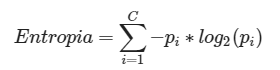


Onde:

pi representa a proporção de dados no conjunto de dados (S), pertencentes à classe específica i; c é o número de classes.


# 6 Validação dos modelos

## 6.1 - Matriz de confusão


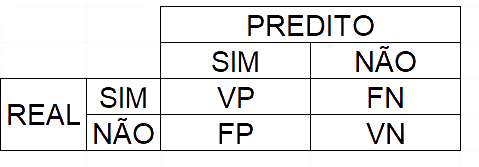

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix
mc_svc = confusion_matrix(y_teste, previsoes_svc)
mc_knn = confusion_matrix(y_teste, previsoes_knn)
mc_nb = confusion_matrix(y_teste, previsoes_nb)
mc_dt = confusion_matrix(y_teste, previsoes_dt)

## Código Matrix de confusão

In [ ]:
# Definindo os valores verdadeiros e preditos:

valores_preditos = [0, 1, 1, 1, 0, 0, 1, 0, 0, 1]
valores_verdadeiros= valores_verdadeiros= [0, 1, 0, 1, 0, 0, 1, 0, 1, 0]

In [ ]:
# Importando o método da matriz de confusão

from sklearn.metrics import confusion_matrix

mc = confusion_matrix(valores_verdadeiros, valores_preditos)  # Matriz de confusão
mc

array([[4, 2],
       [1, 3]])

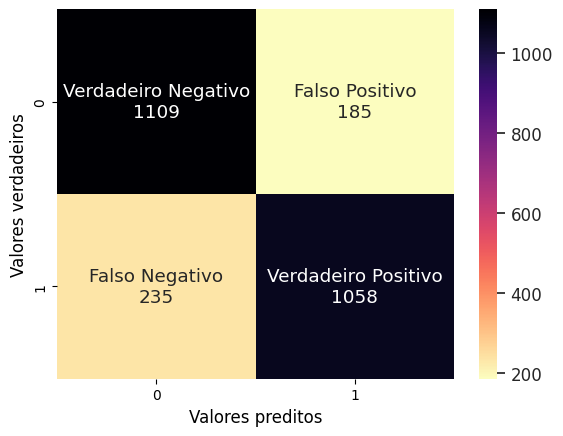

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def gerando_matriz(matriz_confusao, labels, categorias, cmap="viridis"):
    group_counts = [f"{value}" for value in matriz_confusao.flatten()]
    labels = [f"{v1}" for v1 in labels]
    lb = [f"{v1}\n{v2}" for v1, v2 in zip(labels, group_counts)]
    lb = np.asarray(lb).reshape(matriz_confusao.shape)

    ax = plt.subplot()
    sns.set(font_scale=1.1)
    sns.heatmap(matriz_confusao, annot=lb, ax=ax, cmap=cmap, fmt="", xticklabels=categorias,yticklabels=categorias)

    label_font = {'size':'12'}
    ax.set_xlabel('Valores preditos', fontdict=label_font);
    ax.set_ylabel('Valores verdadeiros', fontdict=label_font);

    ax.tick_params(axis='both', which='major', labelsize=10)


categorias = ["0", "1"]
labels = ['Verdadeiro Negativo','Falso Positivo',
          'Falso Negativo','Verdadeiro Positivo']

gerando_matriz(mc_svc, labels, categorias, cmap="magma_r")

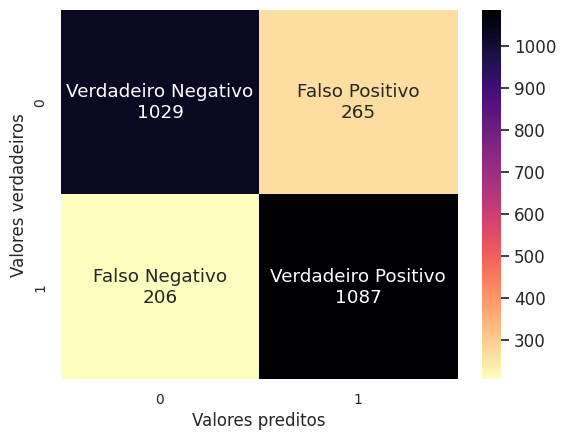

In [ ]:
gerando_matriz(mc_knn, labels, categorias, cmap="magma_r")

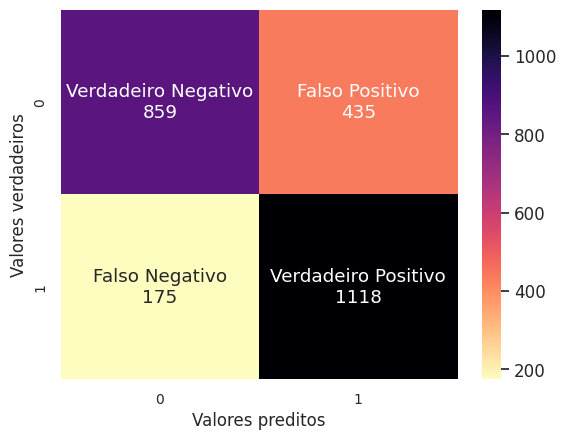

In [ ]:
gerando_matriz(mc_nb, labels, categorias, cmap="magma_r")

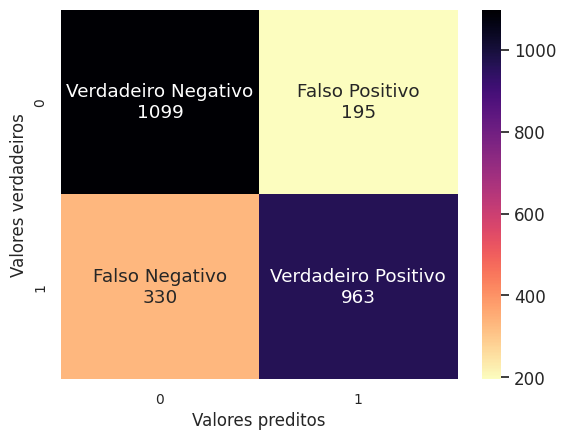

In [ ]:
gerando_matriz(mc_dt, labels, categorias, cmap="magma_r")

## 6.2 - Acurácia
A partir do calculo da matriz de confusão conseguimos inferir outras métricas, como por exemplo a acurária.




$ACC$ = ${TP + TN \over TP + FP + TN + FN}$

In [ ]:
# Calculando a acurácia para cada modelo
acuracia_svc = accuracy_score(y_teste, previsoes_svc)
acuracia_knn = accuracy_score(y_teste, previsoes_knn)
acuracia_nb = accuracy_score(y_teste, previsoes_nb)
acuracia_dt = accuracy_score(y_teste, previsoes_dt)

# Imprimindo as acurácias
print("Acurácia SVC:", acuracia_svc)
print("Acurácia KNN:", acuracia_knn)
print("Acurácia Naive Bayes:", acuracia_nb)
print("Acurácia Árvore de Decisão:", acuracia_dt)


Acurácia SVC: 0.8376497873985311
Acurácia KNN: 0.8179358330112099
Acurácia Naive Bayes: 0.7642056436026285
Acurácia Árvore de Decisão: 0.7970622342481639


## 6.3 - Precisão

Outra métrica importante é a precisão, que calcula quantos foram classificados corretamento como positivos ($TP$).

$PS$ = ${TP \over TP + FP}$

In [ ]:
from sklearn.metrics import precision_score

# Calculando a precisão para cada modelo
precisao_svc = precision_score(y_teste, previsoes_svc)
precisao_knn = precision_score(y_teste, previsoes_knn)
precisao_nb = precision_score(y_teste, previsoes_nb)
precisao_dt = precision_score(y_teste, previsoes_dt)

# Imprimindo as precisões
print("Precisão SVC:", precisao_svc)
print("Precisão KNN:", precisao_knn)
print("Precisão Naive Bayes:", precisao_nb)
print("Precisão Árvore de Decisão:", precisao_dt)


Precisão SVC: 0.8511665325824618
Precisão KNN: 0.8039940828402367
Precisão Naive Bayes: 0.7198969735994849
Precisão Árvore de Decisão: 0.8316062176165803


## 6.4 - Recall

Outra métrica importante é a Recall ou revocação ou ainda sensibilidade, que calcula o quão bom o modelo está para classificar corretamente um resultado positivo ($TP$).

$RC$ = ${TP \over TP + FN}$

In [ ]:
from sklearn.metrics import recall_score

# Calculando o recall para cada modelo
recall_svc = recall_score(y_teste, previsoes_svc)
recall_knn = recall_score(y_teste, previsoes_knn)
recall_nb = recall_score(y_teste, previsoes_nb)
recall_dt = recall_score(y_teste, previsoes_dt)

# Imprimindo os recalls
print("Recall SVC:", recall_svc)
print("Recall KNN:", recall_knn)
print("Recall Naive Bayes:", recall_nb)
print("Recall Árvore de Decisão:", recall_dt)


Recall SVC: 0.8182521268368136
Recall KNN: 0.8406805877803558
Recall Naive Bayes: 0.8646558391337974
Recall Árvore de Decisão: 0.7447795823665894


## 6.5 - Escolhendo o melhor modelo


In [ ]:
# Comparando as métricas de cada modelo
print("Acurácia SVC:", acuracia_svc)
print("Acurácia KNN:", acuracia_knn)
print("Acurácia Naive Bayes:", acuracia_nb)
print("Acurácia Árvore de Decisão:", acuracia_dt)
print("\n")
print("Precisão SVC:", precisao_svc)
print("Precisão KNN:", precisao_knn)
print("Precisão Naive Bayes:", precisao_nb)
print("Precisão Árvore de Decisão:", precisao_dt)
print("\n")
print("Recall SVC:", recall_svc)
print("Recall KNN:", recall_knn)
print("Recall Naive Bayes:", recall_nb)
print("Recall Árvore de Decisão:", recall_dt)

# Escolhendo o melhor modelo com base nas métricas
melhor_modelo = ""
melhor_acuracia = 0

if acuracia_svc > melhor_acuracia:
  melhor_modelo = "SVC"
  melhor_acuracia = acuracia_svc
elif acuracia_knn > melhor_acuracia:
  melhor_modelo = "KNN"
  melhor_acuracia = acuracia_knn
elif acuracia_nb > melhor_acuracia:
  melhor_modelo = "Naive Bayes"
  melhor_acuracia = acuracia_nb
elif acuracia_dt > melhor_acuracia:
  melhor_modelo = "Árvore de Decisão"
  melhor_acuracia = acuracia_dt

print("\n")
print("O melhor modelo é:", melhor_modelo, "com acurácia de:", melhor_acuracia)


Acurácia SVC: 0.8376497873985311
Acurácia KNN: 0.8179358330112099
Acurácia Naive Bayes: 0.7642056436026285
Acurácia Árvore de Decisão: 0.7970622342481639


Precisão SVC: 0.8511665325824618
Precisão KNN: 0.8039940828402367
Precisão Naive Bayes: 0.7198969735994849
Precisão Árvore de Decisão: 0.8316062176165803


Recall SVC: 0.8182521268368136
Recall KNN: 0.8406805877803558
Recall Naive Bayes: 0.8646558391337974
Recall Árvore de Decisão: 0.7447795823665894


O melhor modelo é: SVC com acurácia de: 0.8376497873985311
